## 1. Data Import & Initial Assessment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configure visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load dataset
df = pd.read_csv('/content/Bitcoin_history_data.csv')

print(f"Dataset loaded: {df.shape[0]:,} observations × {df.shape[1]} features")
print(f"Memory footprint: {df.memory_usage(deep=True).sum()/1024**2:.1f} MB")

Dataset loaded: 3,966 observations × 6 features
Memory footprint: 0.4 MB


In [ ]:
# Dataset overview
print("Dataset Structure:")
df.info()

print("\nSample Records:")
display(df.head())

print("\nData Types Summary:")
print(df.dtypes.value_counts().to_dict())

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3966 entries, 0 to 3965
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3966 non-null   object 
 1   Close   3966 non-null   float64
 2   High    3966 non-null   float64
 3   Low     3966 non-null   float64
 4   Open    3966 non-null   float64
 5   Volume  3966 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 186.0+ KB

Sample Records:


,Date,Close,High,Low,Open,Volume
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100



Data Types Summary:
{dtype('float64'): 4, dtype('O'): 1, dtype('int64'): 1}


## 2. Data Quality Assessment

In [ ]:
# Missing data analysis
missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df) * 100).round(2)

quality_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_pct,
    'Data_Type': df.dtypes
})

# Filter and display problematic columns
issues = quality_summary[quality_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(issues) > 0:
    print("Data Quality Issues:")
    display(issues)

    # Visualization for missing data
    if len(issues) <= 10:
        plt.figure(figsize=(10, 5))
        sns.barplot(data=issues.reset_index(), y='index', x='Missing_Percentage', orient='h')
        plt.title('Missing Data Analysis')
        plt.xlabel('Missing Data (%)')
        plt.tight_layout()
        plt.show()
else:
    print(" Data quality check passed - no missing values detected")

 Data quality check passed - no missing values detected


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
print("Updated Data Types Summary:")
print(df.dtypes.value_counts().to_dict())

Updated Data Types Summary:
{dtype('float64'): 4, dtype('<M8[ns]'): 1, dtype('int64'): 1}


In [ ]:
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    print(f"Duplicate rows found: {duplicate_rows}")
    print("\nSample of duplicate rows:")
    display(df[df.duplicated(keep=False)].sort_values(by='Date').head())
else:
    print(" No duplicate rows found.")

 No duplicate rows found.


## 3. Variable Classification & Summary Statistics

In [ ]:
# Classify variables by type
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print(f"Variable Classification:")
print(f"• Numeric: {len(numeric_cols)} variables")
print(f"• Categorical: {len(categorical_cols)} variables")
print(f"• DateTime: {len(datetime_cols)} variables")

# Summary statistics for numeric variables
if numeric_cols:
    print("\nDescriptive Statistics (Numeric Variables):")
    display(df[numeric_cols].describe().round(2))

Variable Classification:
• Numeric: 5 variables
• Categorical: 0 variables
• DateTime: 1 variables

Descriptive Statistics (Numeric Variables):


,Close,High,Low,Open,Volume
count,3966.00,3966.00,3966.00,3966.00,3.966000e+03
mean,23700.72,24175.47,23148.37,23672.24,2.005692e+10
std,27883.04,28377.64,27301.54,27846.45,2.142796e+10
min,178.10,211.73,171.51,176.90,5.914570e+06
25%,2319.26,2416.03,2224.78,2321.01,9.596135e+08
50%,10134.78,10313.31,9752.53,10130.23,1.612212e+10
75%,37845.02,39048.44,36837.16,37818.79,3.140978e+10
max,119995.41,123091.61,118959.20,119997.45,3.509679e+11


## 4. Univariate Analysis

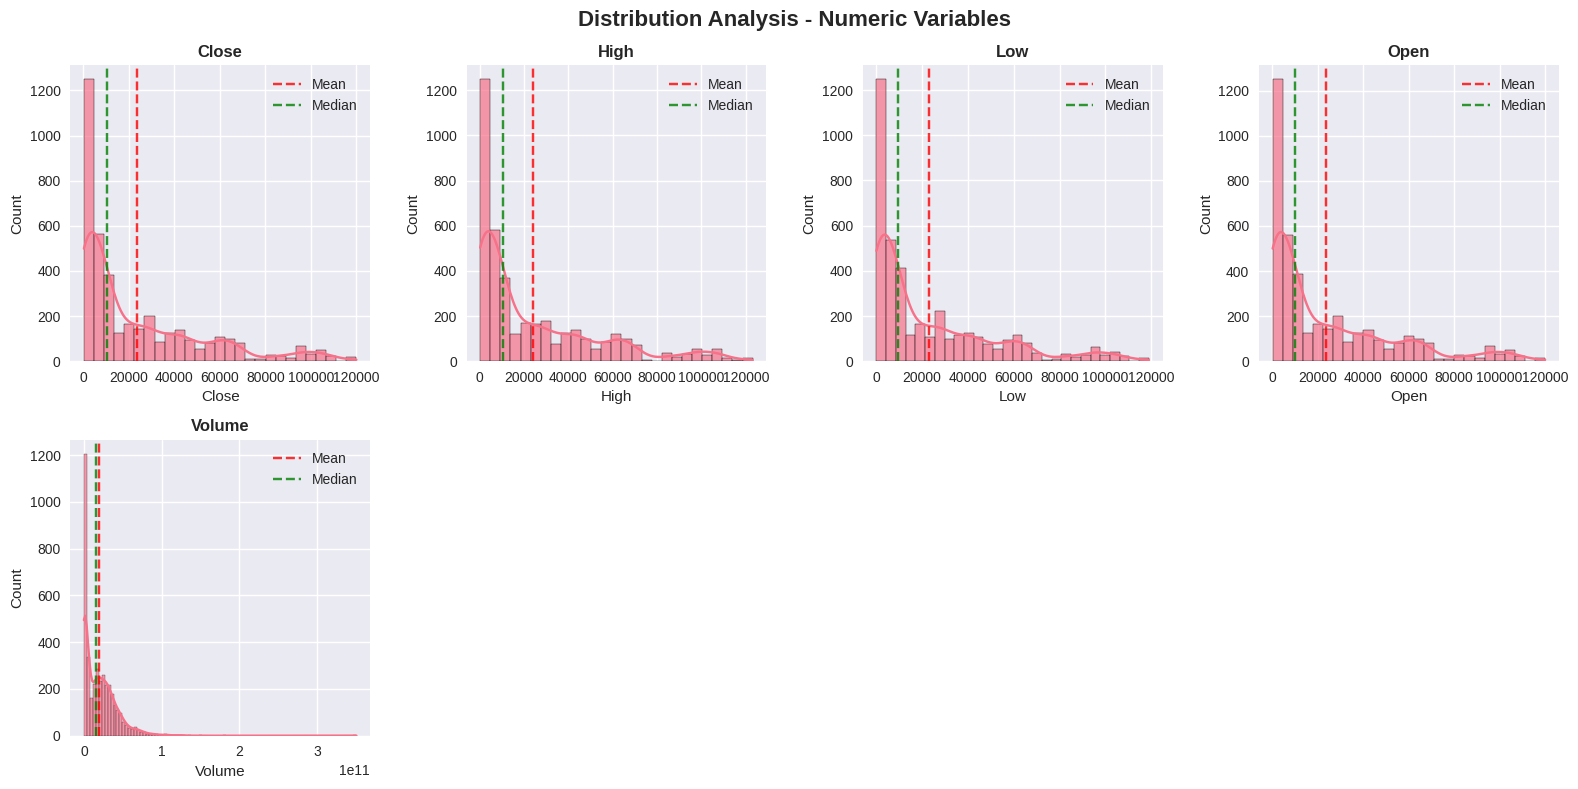

In [ ]:
# Numeric variable distributions
if numeric_cols:
    n_cols = min(4, len(numeric_cols))
    n_rows = (len(numeric_cols[:8]) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    if len(numeric_cols) == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols[:8]):
        sns.histplot(df[col], kde=True, ax=axes[i], alpha=0.7)
        axes[i].axvline(df[col].mean(), color='red', linestyle='--', alpha=0.8, label='Mean')
        axes[i].axvline(df[col].median(), color='green', linestyle='--', alpha=0.8, label='Median')
        axes[i].set_title(f'{col}', fontweight='bold')
        axes[i].legend()

    # Hide unused subplots
    for i in range(len(numeric_cols[:8]), len(axes)):
        axes[i].axis('off')

    plt.suptitle('Distribution Analysis - Numeric Variables', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

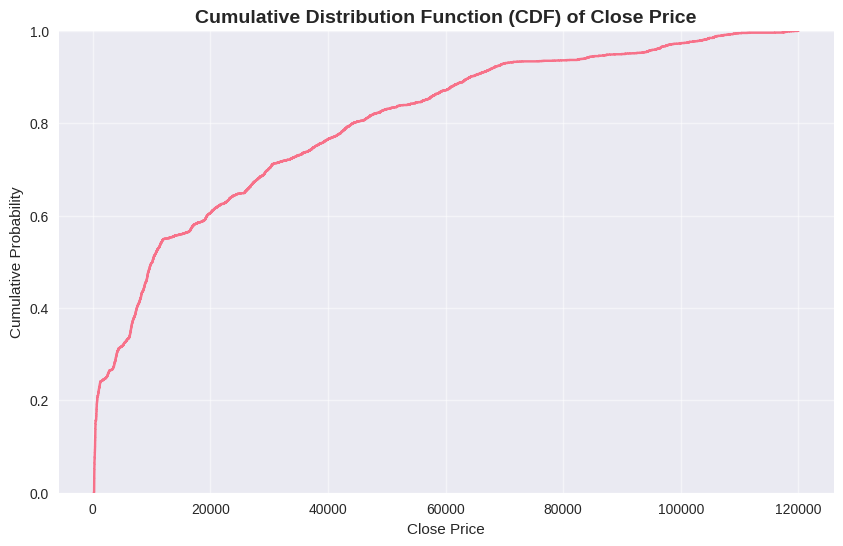

In [ ]:
# CDF for 'Close' price
if 'Close' in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.ecdfplot(data=df, x='Close')
    plt.title('Cumulative Distribution Function (CDF) of Close Price', fontsize=14, fontweight='bold')
    plt.xlabel('Close Price')
    plt.ylabel('Cumulative Probability')
    plt.grid(True, alpha=0.5)
    plt.show()

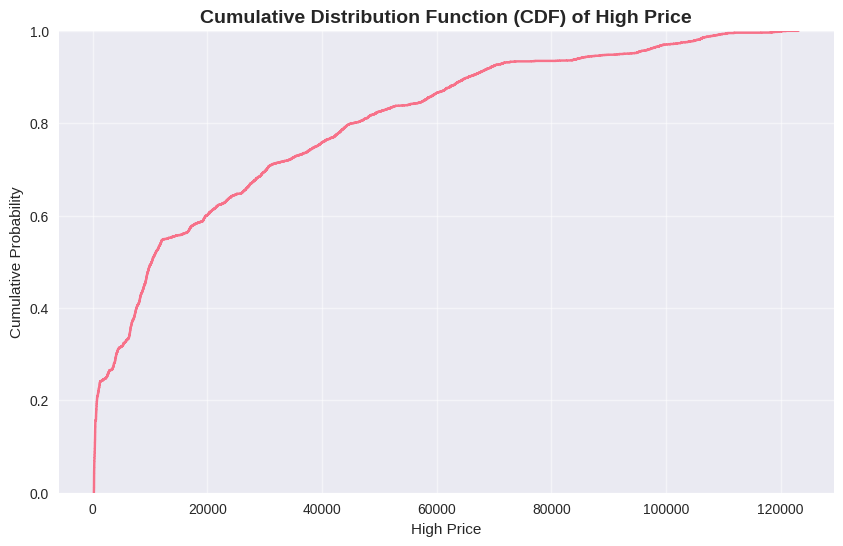

In [ ]:
# CDF for 'High' price
if 'High' in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.ecdfplot(data=df, x='High')
    plt.title('Cumulative Distribution Function (CDF) of High Price', fontsize=14, fontweight='bold')
    plt.xlabel('High Price')
    plt.ylabel('Cumulative Probability')
    plt.grid(True, alpha=0.5)
    plt.show()

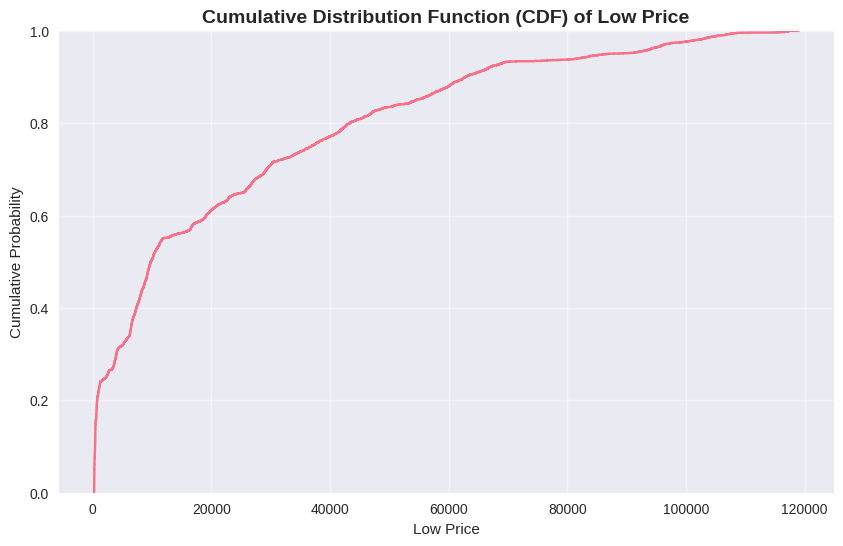

In [ ]:
# CDF for 'Low' price
if 'Low' in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.ecdfplot(data=df, x='Low')
    plt.title('Cumulative Distribution Function (CDF) of Low Price', fontsize=14, fontweight='bold')
    plt.xlabel('Low Price')
    plt.ylabel('Cumulative Probability')
    plt.grid(True, alpha=0.5)
    plt.show()

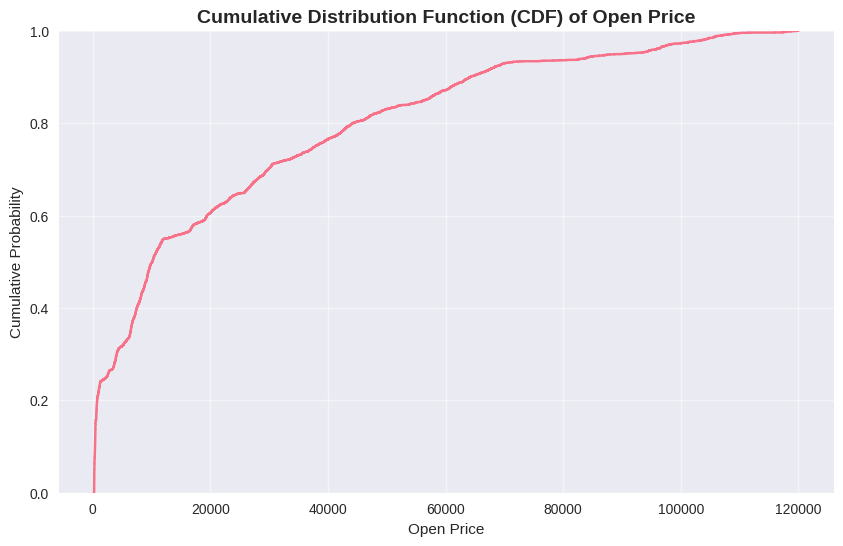

In [ ]:
# CDF for 'Open' price
if 'Open' in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.ecdfplot(data=df, x='Open')
    plt.title('Cumulative Distribution Function (CDF) of Open Price', fontsize=14, fontweight='bold')
    plt.xlabel('Open Price')
    plt.ylabel('Cumulative Probability')
    plt.grid(True, alpha=0.5)
    plt.show()

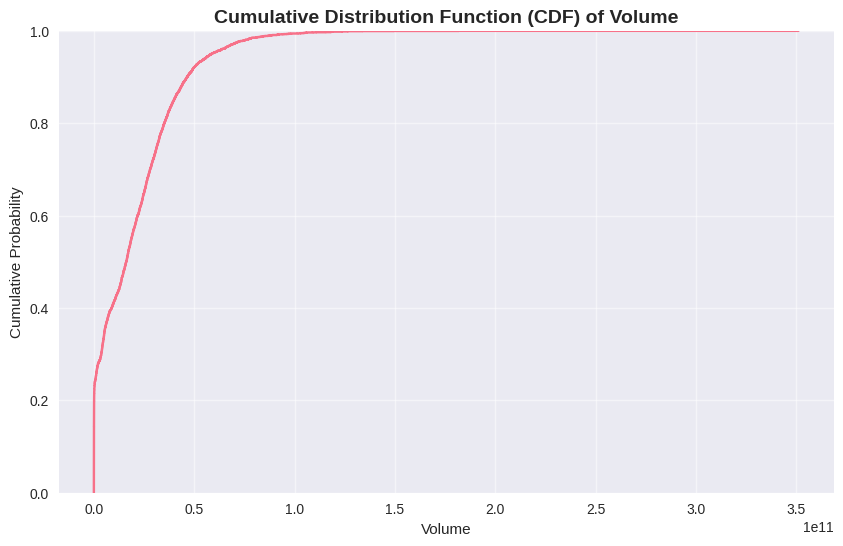

In [ ]:
# CDF for 'Volume'
if 'Volume' in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.ecdfplot(data=df, x='Volume')
    plt.title('Cumulative Distribution Function (CDF) of Volume', fontsize=14, fontweight='bold')
    plt.xlabel('Volume')
    plt.ylabel('Cumulative Probability')
    plt.grid(True, alpha=0.5)
    plt.show()

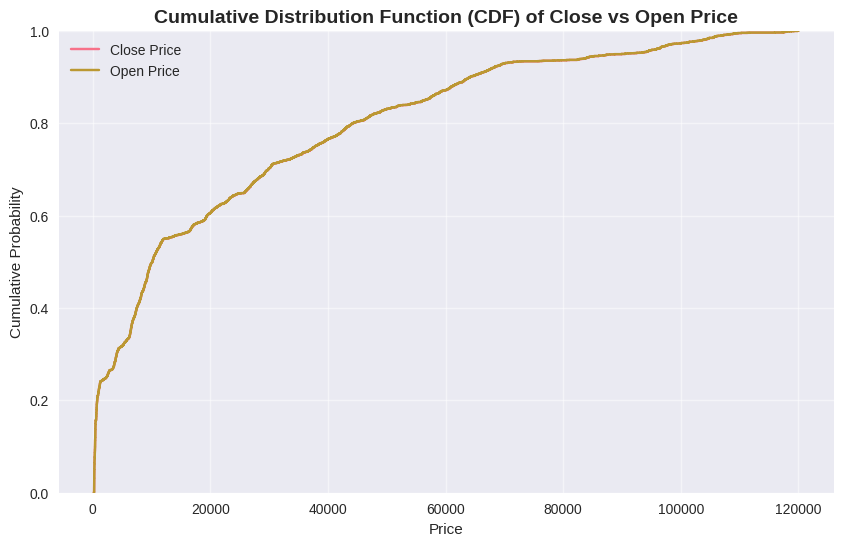

In [ ]:
# Combined CDF for 'Close' and 'Open' prices
if 'Close' in numeric_cols and 'Open' in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.ecdfplot(data=df, x='Close', label='Close Price')
    sns.ecdfplot(data=df, x='Open', label='Open Price')
    plt.title('Cumulative Distribution Function (CDF) of Close vs Open Price', fontsize=14, fontweight='bold')
    plt.xlabel('Price')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.show()

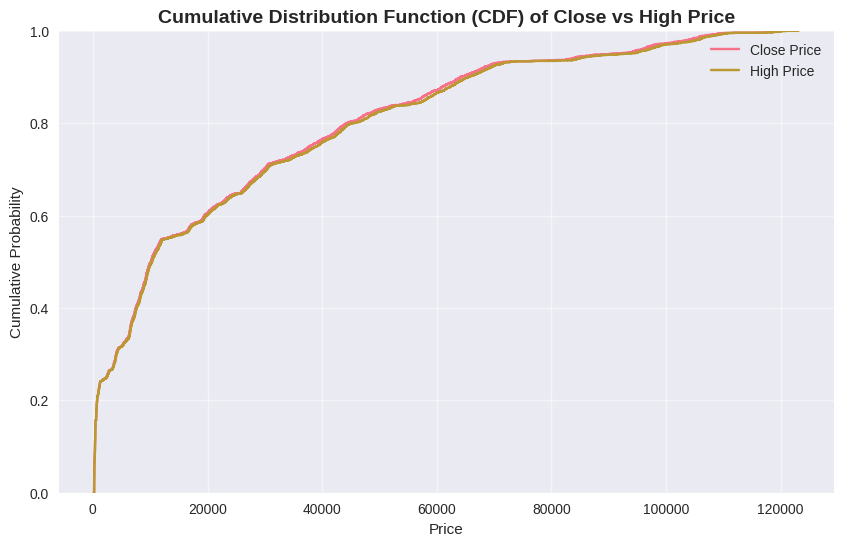

In [ ]:
# Combined CDF for 'Close' and 'High' prices
if 'Close' in numeric_cols and 'High' in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.ecdfplot(data=df, x='Close', label='Close Price')
    sns.ecdfplot(data=df, x='High', label='High Price')
    plt.title('Cumulative Distribution Function (CDF) of Close vs High Price', fontsize=14, fontweight='bold')
    plt.xlabel('Price')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.show()

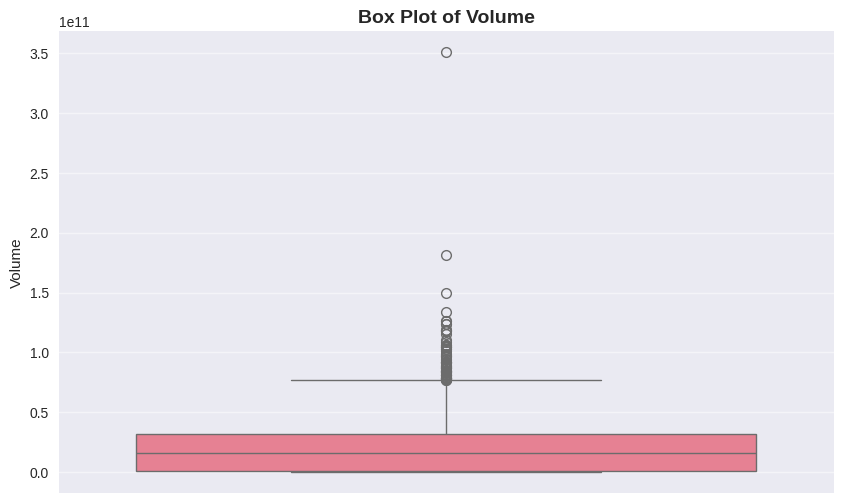

In [ ]:
# Box plot for 'Volume'
if 'Volume' in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df['Volume'])
    plt.title('Box Plot of Volume', fontsize=14, fontweight='bold')
    plt.ylabel('Volume')
    plt.grid(axis='y', alpha=0.5)
    plt.show()

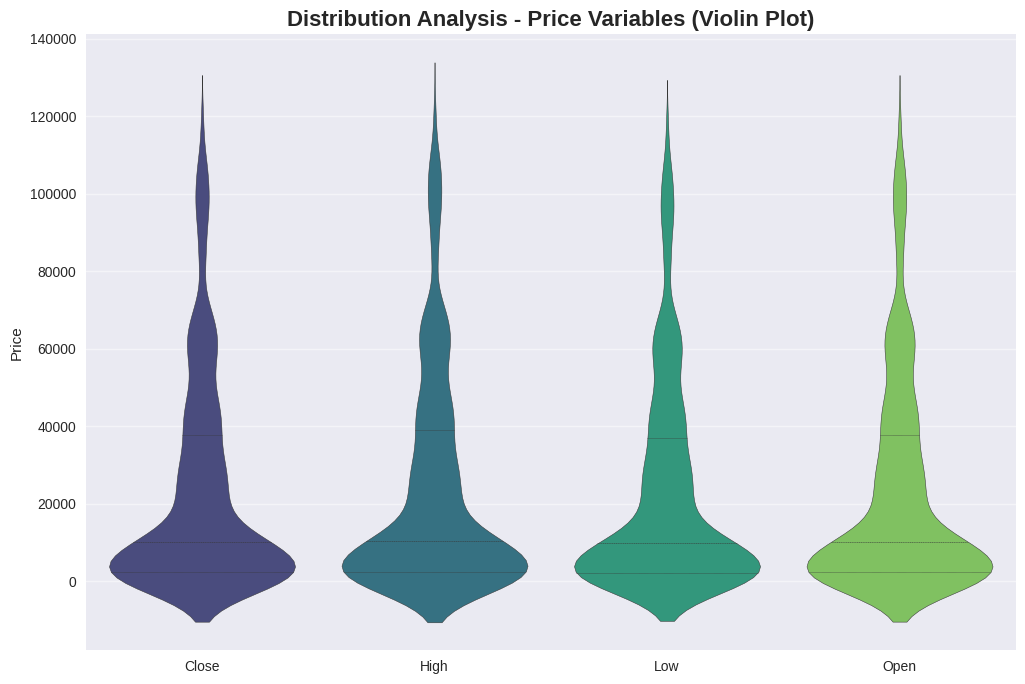

In [ ]:
# Violin plot for price variables
price_cols = ['Close', 'High', 'Low', 'Open']
if all(col in numeric_cols for col in price_cols):
    plt.figure(figsize=(12, 8))
    sns.violinplot(data=df[price_cols], inner="quartile", palette="viridis")
    plt.title('Distribution Analysis - Price Variables (Violin Plot)', fontsize=16, fontweight='bold')
    plt.ylabel('Price')
    plt.grid(axis='y', alpha=0.5)
    plt.show()

## 5. Multivariate Analysis

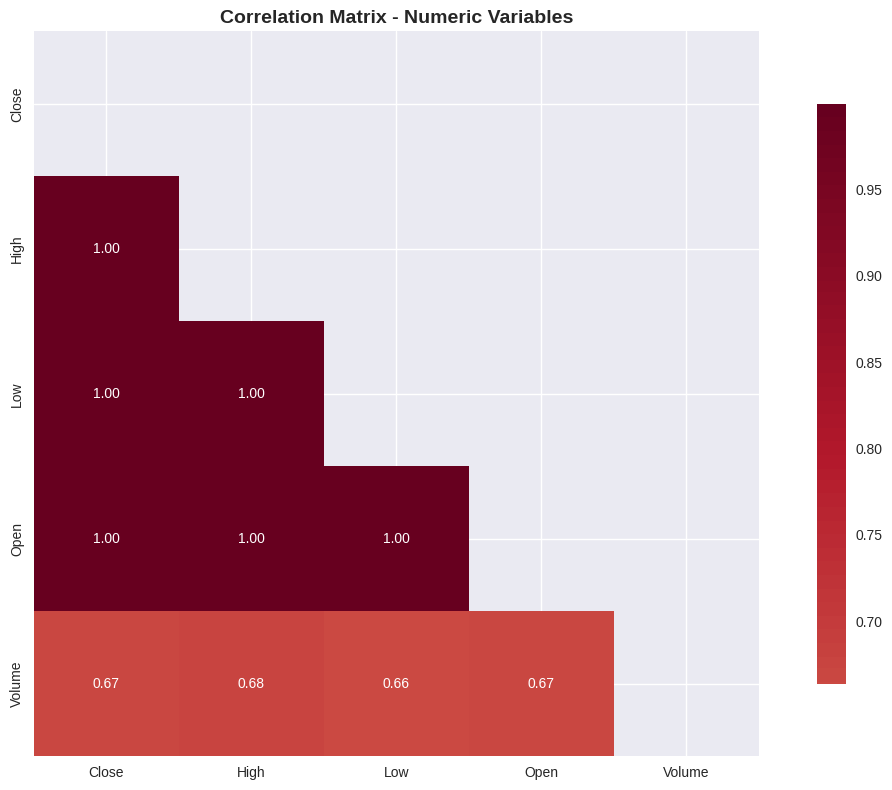

Strong Correlations (|r| > 0.7):
  • Close ↔ High: 1.000
  • Close ↔ Low: 1.000
  • Close ↔ Open: 0.999
  • High ↔ Low: 0.999
  • High ↔ Open: 1.000
  • Low ↔ Open: 1.000


In [ ]:
# Correlation analysis for numeric variables
if len(numeric_cols) > 1:
    correlation_matrix = df[numeric_cols].corr()

    # Create correlation heatmap
    plt.figure(figsize=(12, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r',
                center=0, square=True, fmt='.2f', cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix - Numeric Variables', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Identify strong correlations
    strong_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                strong_correlations.append((correlation_matrix.columns[i],
                                          correlation_matrix.columns[j], corr_val))

    if strong_correlations:
        print("Strong Correlations (|r| > 0.7):")
        for var1, var2, corr in strong_correlations:
            print(f"  • {var1} ↔ {var2}: {corr:.3f}")
    else:
        print("No strong correlations (|r| > 0.7) detected.")

## 6. Outlier Detection & Analysis

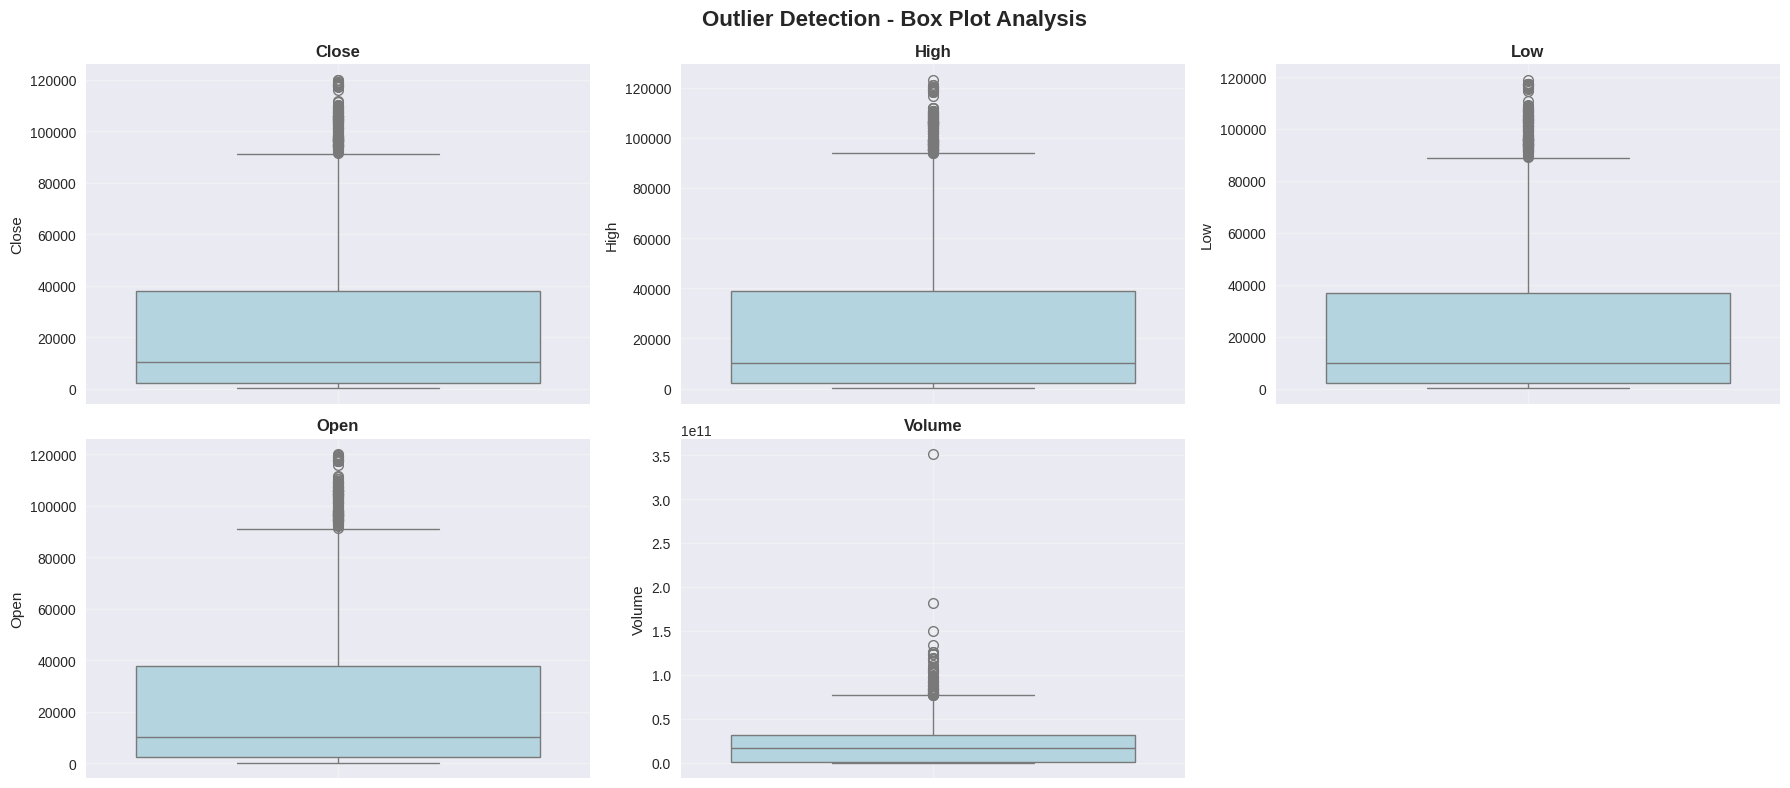

In [ ]:
# Box plot analysis for outlier detection
if numeric_cols:
    n_vars = min(6, len(numeric_cols))
    fig, axes = plt.subplots(2, 3, figsize=(18, 8))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols[:n_vars]):
        sns.boxplot(y=df[col], ax=axes[i], color='lightblue')
        axes[i].set_title(f'{col}', fontweight='bold')
        axes[i].grid(True, alpha=0.3)

    # Hide unused subplots
    for i in range(n_vars, len(axes)):
        axes[i].axis('off')

    plt.suptitle('Outlier Detection - Box Plot Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [ ]:
# Quantitative outlier analysis using IQR method
if numeric_cols:
    outlier_analysis = []

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_fence) | (df[col] > upper_fence)]
        outlier_count = len(outliers)
        outlier_percentage = round((outlier_count / len(df)) * 100, 2)

        outlier_analysis.append({
            'Variable': col,
            'Outlier_Count': outlier_count,
            'Outlier_Percentage': outlier_percentage,
            'Lower_Fence': round(lower_fence, 2),
            'Upper_Fence': round(upper_fence, 2)
        })

    outlier_summary = pd.DataFrame(outlier_analysis)
    outliers_detected = outlier_summary[outlier_summary['Outlier_Count'] > 0]

    if len(outliers_detected) > 0:
        print("Outlier Analysis Summary:")
        display(outliers_detected.sort_values('Outlier_Percentage', ascending=False))
    else:
        print("No significant outliers detected using IQR method.")

Outlier Analysis Summary:


,Variable,Outlier_Count,Outlier_Percentage,Lower_Fence,Upper_Fence
0,Close,195,4.92,-5.096937e+04,9.113365e+04
1,High,195,4.92,-5.253258e+04,9.399705e+04
2,Low,195,4.92,-4.969380e+04,8.875573e+04
3,Open,194,4.89,-5.092565e+04,9.106545e+04
4,Volume,71,1.79,-4.471563e+10,7.708502e+10


## 7. Executive Summary & Recommendations

## 7. Executive Summary & Recommendations

### Executive Summary

This analysis provides a comprehensive overview of the Bitcoin historical data, focusing on data quality, structure, distribution, relationships between variables, and outlier detection.

- The dataset contains 3,966 observations and 6 features.
- The memory footprint is 0.4 MB.
- The dataset includes Date, Close, High, Low, Open, and Volume.

### Data Quality Assessment
- No missing values were detected in the dataset.
- No duplicate rows were found.
- The 'Date' column has been successfully converted to datetime format.

### Variable Classification & Summary Statistics
- The dataset contains 5 numeric, 0 categorical, and 1 datetime variables.
- Descriptive statistics for numeric variables show a wide range of values, particularly for price and volume, indicating significant fluctuations over time.

### Univariate Analysis
- Histograms and CDF plots revealed that the price variables (Close, High, Low, Open) and Volume have skewed distributions, with a concentration of data points at lower values and a long tail towards higher values.
- The time series plot of the 'Date' column shows the frequency of data points over time, indicating a consistent daily recording.
- Violin plots for price variables confirm the skewed distributions and highlight the spread and density of prices.
- The box plot for 'Volume' indicates the presence of numerous outliers, suggesting periods of exceptionally high trading activity.

### Multivariate Analysis
- The correlation matrix shows very strong positive correlations (close to 1) between the price variables (Close, High, Low, Open), as expected.
- Volume shows a moderate positive correlation with the price variables.

### Outlier Detection & Analysis
- The IQR method identified outliers in all numeric variables, with price variables showing a higher percentage of outliers compared to Volume.
- These outliers, particularly in price, likely represent periods of significant market volatility or rapid price movements.

## Recommendations

Based on this initial analysis, the following recommendations are made:
- **Address Outliers:** Depending on the intended use of the data, further investigation and handling of outliers in price and volume might be necessary. This could involve capping, transformation, or removal, depending on the modeling approach.
- **Time Series Analysis:** Given the datetime nature of the data, time series specific analysis techniques should be applied to understand trends, seasonality, and cycles in Bitcoin prices and volume.
- **Feature Engineering:** Consider creating new features from the existing data, such as daily price change, volatility measures, or moving averages, which could be valuable for predictive modeling.
- **Further Exploration:** Investigate the periods corresponding to the detected outliers to understand the underlying market events or factors that contributed to these extreme values.